In [0]:
# importing pandas library for reading article.csv fie
# pandas stands for “Python Data Analysis Library”
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()
# after hitting shift + enter, choose the csv file

Saving article.csv to article.csv


In [0]:
# reading the article.csv file
df = pd.read_csv("article.csv",encoding = 'unicode_escape')

In [4]:
# printing all the text that is available in out article.csv file
df['article_text'][0]

'6.1 Non-Banking Financial Institutions (NBFIs) sector in India comprises various types of financial institutions with each one of them having its roots at a particular stage of development of the financial sector. All-India financial institutions (AIFIs), largely an outcome of the development planning in India, were created for long-term financing. Non-banking financial companies (NBFCs), on the other hand, are mostly private sector institutions which provide a variety of services including equipment leasing, hire purchase, loans, and investments. Primary dealers (PDs), which came into existence in 1995, have played an important role in both the primary and secondary Government securities market. Although commonly grouped as NBFIs, the nature of operations of FIs, NBFCs and PDs are quite different from each other. The regulatory focus in respect of these three types of NBFIs is also different. Business operations and financial performance of these entities are driven mainly by sector-

In [5]:
# nltk is a package which consist of set of libraries for natural language processing.
# tokenization is the process of tokenizing or splitting a string, text into a list of tokens.
# punkt is a sentence tokenizer which divides a text into a list of sentences.
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

sentences = []
for s in df['article_text']:        # article_text is the only column name of our article.csv file
  sentences.append(sent_tokenize(s))


# after execution of below line, there will be array of sentences
sentences = [y for x in sentences for y in x]       # value ateach index of sentences will contain a sentence 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
# first 2 sentence
sentences[:2]

['6.1 Non-Banking Financial Institutions (NBFIs) sector in India comprises various types of financial institutions with each one of them having its roots at a particular stage of development of the financial sector.',
 'All-India financial institutions (AIFIs), largely an outcome of the development planning in India, were created for long-term financing.']

In [7]:
"""GloVe: Global Vectors for Word Representation 
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. 
Training is performed on aggregated global word-word co-occurrence statistics from a corpus, 
and the resulting representations showcase interesting linear substructures of the word vector space."""
# execution of below two lines will help you to get the required files for furthur processing
!wget http://nlp.Stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-04-25 15:45:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-04-25 15:45:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-04-25 15:45:33--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
# extract word vectors
import numpy as np
#  creating a dictionary with key as word and value as vector using glove.6B.100d.txt file
# refer glove.6B.100d.txt for more understanding
word_embeddings = {}    
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()    # splits at space
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')  # to convert input from index 1 to end to an array
    word_embeddings[word] = coefs
f.close()

In [9]:
# printing the length of our dictionary
len(word_embeddings)

400000

In [0]:
#removing punctuations, numbers and special words
# series is a one-dimensional labeled array capable of holding data of any type
# our clean_sentences will contain only alphabets, all other things will be replaced by space
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ") 

In [0]:
# make alphabets into lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [12]:
# in natural language processing, useless words (data), are referred to as stop words.
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# now the task is to remove all useless word (stopword) from our clean_sentences
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
# remove stopwords from the clean_sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [14]:
# printing the two sentences
clean_sentences[:2]

['non banking financial institutions nbfis sector india comprises various types financial institutions one roots particular stage development financial sector',
 'india financial institutions aifis largely outcome development planning india created long term financing']

In [0]:
# now creating a sentence_vectors array 
"""
Each word in our sentence consists of several words and each word contains a vector of length 100.
Below code is taking average of all the vectors of each word in a sentence. 
"""
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum( [word_embeddings.get(w, np.zeros((100,))) for w in i.split()] ) / (len(i.split())+0.001)  # we add 0.001 to make v decimal/float value
  else:
    v = np.zeros((100,))
  sentence_vectors.append(v)

In [16]:
# printing first element of sentence_vectors
sentence_vectors[0]

array([-3.94521277e-02,  3.74356091e-01, -2.60469455e-02,  1.61475708e-01,
        8.69213210e-02, -3.08083681e-01, -4.66548105e-01, -4.33187123e-02,
       -5.24686053e-02,  4.74576057e-02,  1.25342476e-01, -2.73385823e-01,
        2.65694966e-01,  1.69784593e-01, -2.00503497e-01, -1.47251305e-01,
        1.63865423e-01,  2.84150189e-05, -1.19592334e-01,  1.49206152e-01,
       -2.79309521e-02,  3.37675352e-02,  8.54514457e-02, -3.83269292e-02,
       -3.40641385e-01, -4.56024665e-01,  2.10822217e-01, -2.06370606e-01,
       -3.55223145e-01,  1.77778536e-01, -3.12675554e-02,  2.81145883e-01,
       -2.89338512e-01, -2.98202985e-01, -8.26170169e-02, -7.60465814e-02,
        2.14553233e-01,  5.55523918e-02, -4.08986479e-01, -6.46969632e-02,
       -3.59367194e-01, -4.32308026e-01,  2.61287860e-02,  4.69520568e-02,
        9.72340399e-02, -7.36780681e-02,  2.10322086e-01,  3.26367039e-01,
       -3.29290245e-01, -5.66820170e-01, -3.63428501e-01,  1.42581778e-01,
        7.20704354e-03,  

In [0]:
# now creating similarity matrix (sim_mat) of size n*n where n is length of sentences array
# sim_mat will be a symmetric matrix
sim_mat = np.zeros([len(sentences), len(sentences)])      # initializing all cells of sim_mat to 0
from sklearn.metrics.pairwise import cosine_similarity
for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity( sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100) )[0,0]

In [18]:
# printing a random cell
 sim_mat[10][2]       # it tells the similarity between sentence 11 and 3 (since indexing starts from 0)

0.8311280608177185

In [0]:
import matplotlib.pyplot as plt    # used creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, etc.
%matplotlib inline
import networkx as nx         # networkx is a python library for studying graphs and networks.
# from_numpy_array will return a graph from numpy matrix. 
# The numpy matrix is interpreted as an adjacency matrix for the graph.
nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)    # scores is a dictionary which contains sentence no. and its rank

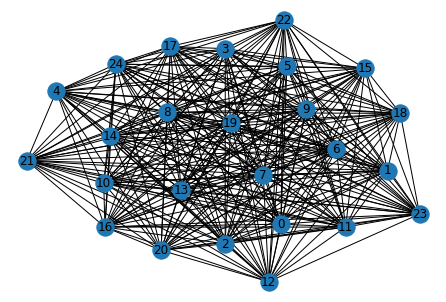

In [20]:
# below is presentation of graph corresponding to our sim_mat which is converted to nx_graph
g = nx_graph
nx.draw(g,with_labels=True)
plt.draw()
plt.show()

In [21]:
# printing scores dictionary to analyze rank
scores

{0: 0.04297320677480327,
 1: 0.041366140518567886,
 2: 0.041446573133879436,
 3: 0.04115488879794297,
 4: 0.03651438509903303,
 5: 0.04063343261455204,
 6: 0.042150064585037436,
 7: 0.04095580484695678,
 8: 0.04121370546219848,
 9: 0.042082790233259997,
 10: 0.040122220171142094,
 11: 0.03964863715402196,
 12: 0.037634691009425424,
 13: 0.03945266703702471,
 14: 0.04065576994384335,
 15: 0.04186729894229205,
 16: 0.04063520382464194,
 17: 0.042408802872652196,
 18: 0.04130901583634201,
 19: 0.041661930653779905,
 20: 0.03955946792506557,
 21: 0.03328380856633555,
 22: 0.03788250842792219,
 23: 0.03367857223095965,
 24: 0.03970841333832004}

In [0]:
# creating a ranked_sentences list in decreasing orderaccording to their rank
ranked_sentences = sorted( ( (scores[i],s) for i,s in enumerate(sentences) ), reverse=True )  

In [25]:
# printing the length of ranked_sentences
y = len(ranked_sentences)
print(y)

25


In [26]:
# extract top 5 sentences as the summary
print("Summary ")
for i in range(5):
  print(ranked_sentences[i][1])

Summary 
6.1 Non-Banking Financial Institutions (NBFIs) sector in India comprises various types of financial institutions with each one of them having its roots at a particular stage of development of the financial sector.
Subsequently, in January 2011, a new category of companies, viz., systemically important non-deposit taking core investment companies (CIC-ND-SI) were brought under regulation and supervision of the Reserve Bank.
Business operations and financial performance of these entities are driven mainly by sector-specific factors.
With the growing importance assigned to financial inclusion, NBFCs have come to be regarded as important financial intermediaries particularly for the small-scale and retail sectors.
Under the new classification, the NBFCs were divided into three major categories, viz., asset finance companies, loan companies, and investment companies.
